In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv("Stars.csv")

In [3]:
df = raw_data.copy()
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


### Dataset Info:
This is a dataset consisting of several features of stars.

Some of them are:

Absolute Temperature (in K)

Relative Luminosity (L/Lo)

Relative Radius (R/Ro)

Absolute Magnitude (Mv)

Star Color (white,Red,Blue,Yellow,yellow-orange etc)

Spectral Class (O,B,A,F,G,K,,M)

Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

_The spectra of stars are described in terms of spectral classes. In order of decreasing temperature,
these spectral classes are O, B, A, F, G, K, M, L, T, and Y. Source lumen learning_

So Star type is **"correlated"** to Temperature. Should drop Temperature when building model.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [11]:
col_list = []
for i in df.columns:
    col_list.append(i)
col_list

['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']

In [60]:
cat_col_list = [df.select_dtypes("object").columns]
cont_col_list = [df.select_dtypes("number").columns]


In [17]:
df_cont = df.loc[:,cont_col_list]

<AxesSubplot:>

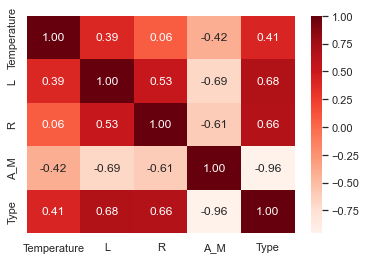

In [18]:
sns.heatmap(df.corr(), center=0, cmap='Reds',annot=True, fmt=".2f")

In [19]:
print(cat_col_list,"\n",cont_col_list)

Index(['Color', 'Spectral_Class'], dtype='object') 
 Index(['Temperature', 'L', 'R', 'A_M', 'Type'], dtype='object')


#### Boxplots of cat variables and continuos

In [10]:
help(df.pivot)

Help on method pivot in module pandas.core.frame:

pivot(index=None, columns=None, values=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    
        .. versionchanged:: 1.1.0
           Also accept list of index names.
    
    columns : str or object or a list of str
        Column to use to make new frame's columns.
    
        .. versionchanged:: 1.1.0
           Also acc

In [15]:
df.select_dtypes("object").columns

Index(['Color', 'Spectral_Class'], dtype='object')

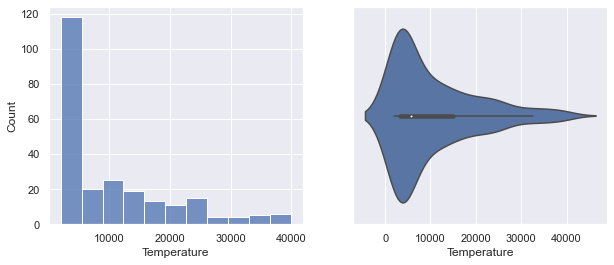

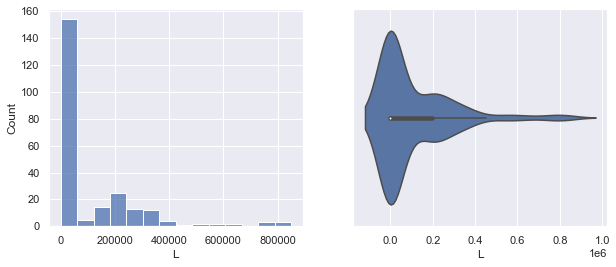

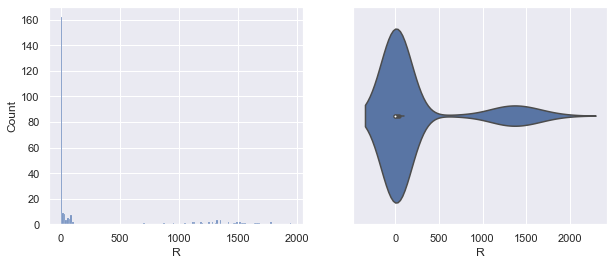

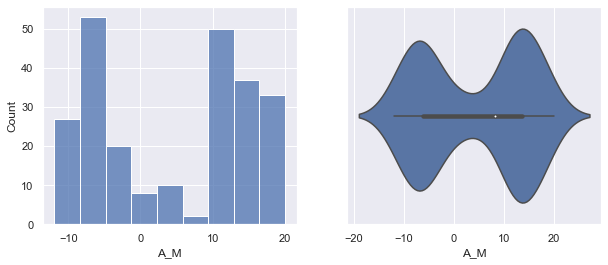

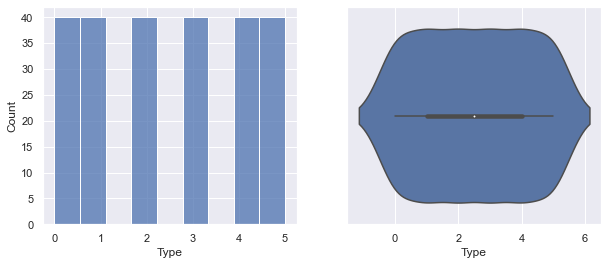

In [24]:
for col in cont_col_list:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0])
#     ax[0].set_title("Histogram")
    sns.violinplot(data=df, x=col, ax=ax[1],hue=df["Type"])
#     ax[1].set_title("Boxplot");

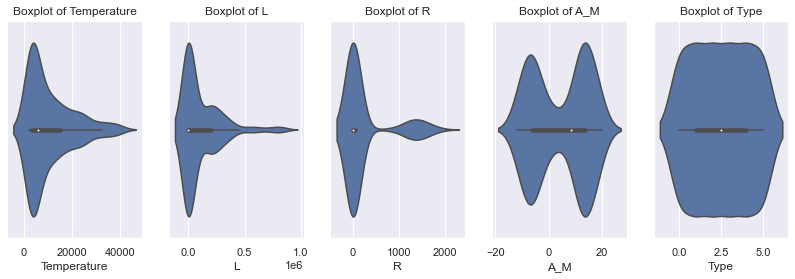

In [35]:
plt.figure(figsize=(14,4))
for i, col in enumerate(cont_col_list):
    ax = plt.subplot(1, len(cont_col_list), i+1)
    sns.violinplot(data=df, x=col, ax=ax,hue=df["Type"],split=True)
    ax.set_title(f"Boxplot of {col}")

<AxesSubplot:xlabel='A_M', ylabel='Temperature'>

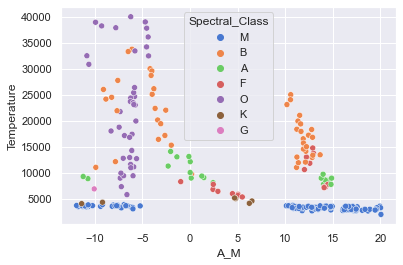

In [72]:
sns.scatterplot(x =df["A_M"],y=df["Temperature"],hue=df["Spectral_Class"],palette="muted")

Help on function scatterplot in module seaborn.relational:

scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can

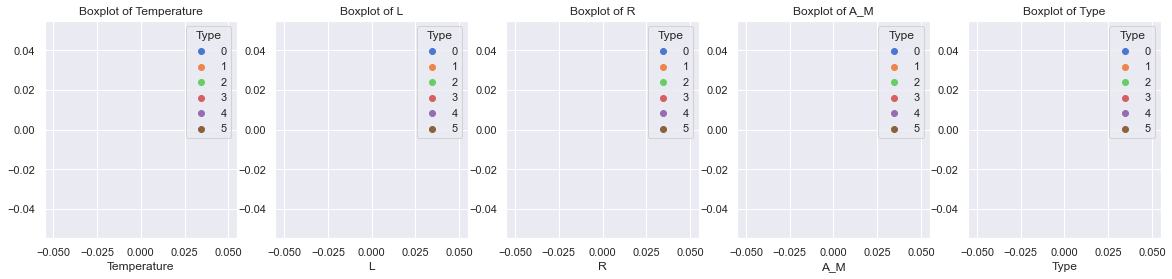

In [56]:
plt.figure(figsize=(20,4))
for i, col in enumerate(cont_col_list):
    ax = plt.subplot(1, len(cont_col_list), i+1)
    sns.scatterplot(data=df, x=col, ax=ax,hue=df["Type"],palette = "muted")
    ax.set_title(f"Boxplot of {col}")

In [64]:
pd.crosstab(df["Spectral_Class"],df["Type"],margins=True).style.background_gradient(cmap='RdYlGn')

Type,0,1,2,3,4,5,All
Spectral_Class,,,,,,,
A,0,0,7,10,0,2,19
B,0,0,24,13,2,7,46
F,0,0,9,8,0,0,17
G,0,0,0,0,0,1,1
K,0,0,0,4,0,2,6
M,40,40,0,0,9,22,111
O,0,0,0,5,29,6,40
All,40,40,40,40,40,40,240


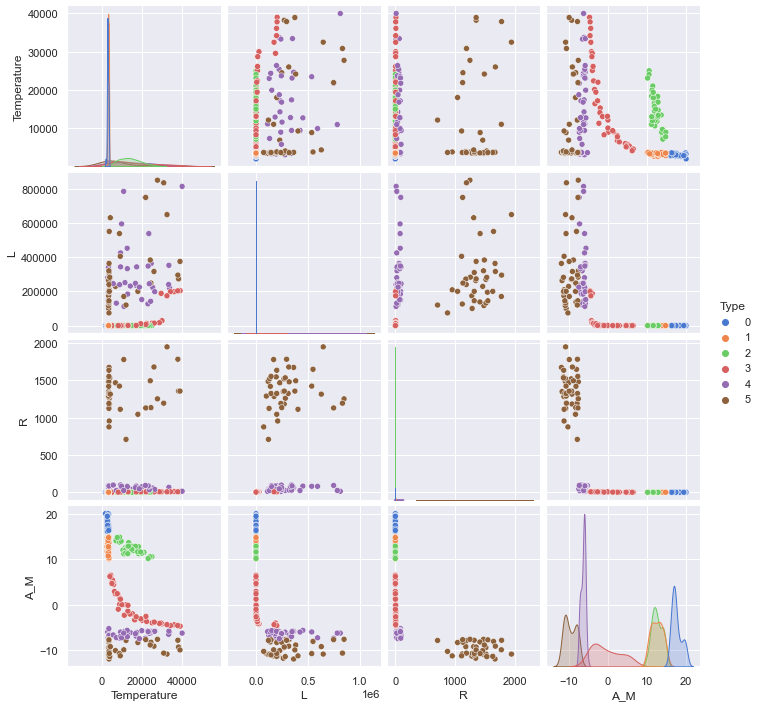

In [70]:
sns.pairplot(df,hue="Type",palette="muted")

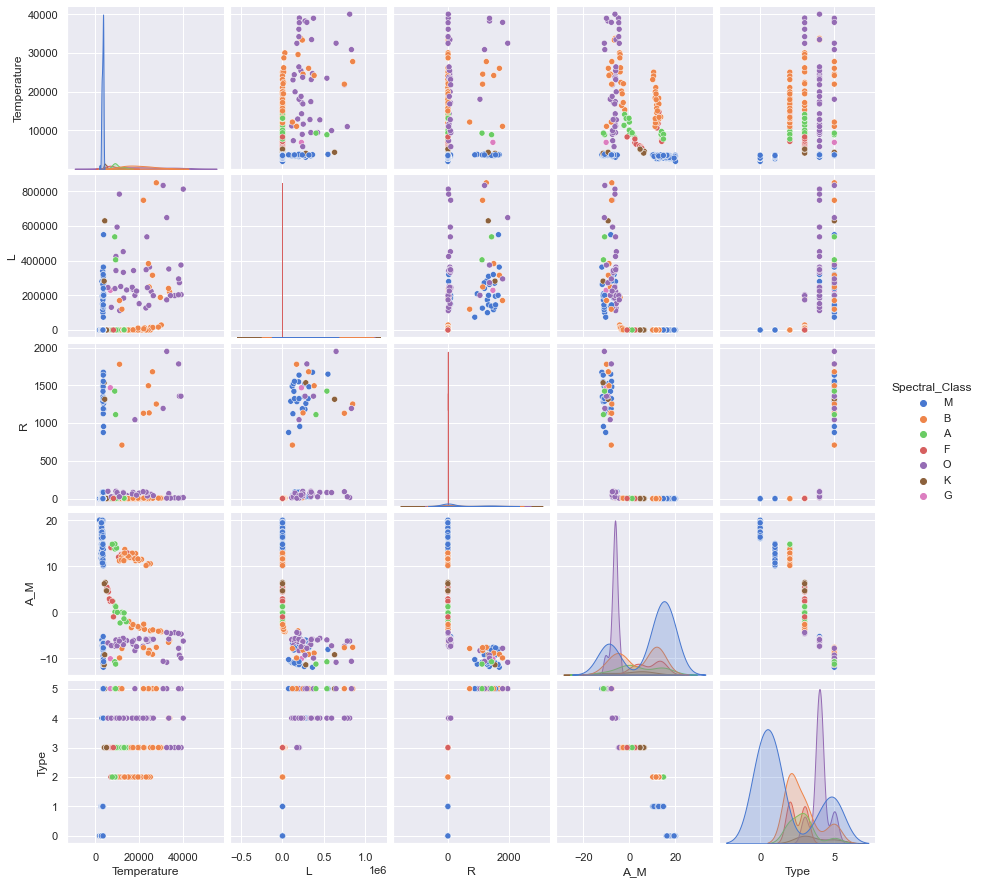

In [71]:
sns.pairplot(df,hue="Spectral_Class",palette="muted")

In [76]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

#### Seeing this correlation makes me remember multicollinearity and VIF
<br>
<br>

Read more about mlticollinearity and Variance Inflation Factor [here](https://statisticalhorizons.com/multicollinearity/).




The code below is from a notebook in a course I took from 365 data science... Just to give them credit.


In [23]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df_alt[['Temperature', 'Luminosity', 'Radius', 'Magnitude']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [24]:
vif

,VIF,Features
0,1.763097,Temperature
1,2.555227,Luminosity
2,1.695046,Radius
3,1.307913,Magnitude
